# Explore here

In [2]:
# Your code here
import pandas as pd

bank_ds = pd.read_csv(r'/workspace/eda_2/data/raw/bank-marketing-campaign-data.csv', sep = ';')

bank_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:

bank_ds.drop(['month', 'day_of_week','pdays', 'contact', 'nr.employed'], axis = 1, inplace = True)


bank_ds.head()

,age,job,marital,education,default,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no


In [4]:
bank_ds.describe()


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000


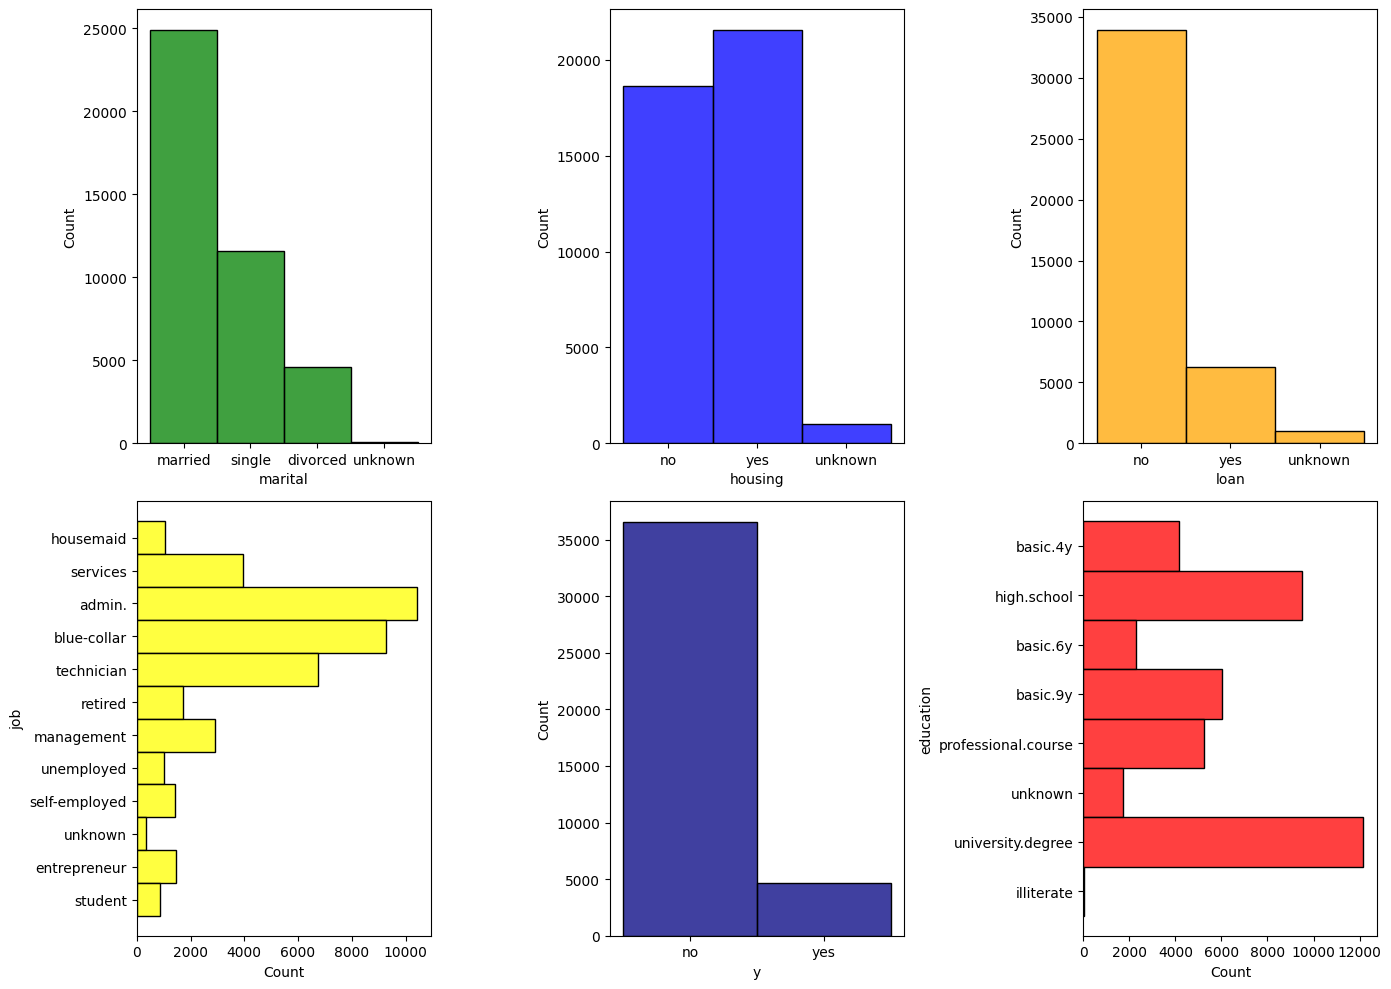

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
#Categorical

fig, axis = plt.subplots(2, 3, figsize = (14, 10))

sns.histplot(ax = axis[0, 0], data = bank_ds, x = "marital", color='green')
sns.histplot(ax = axis[0 ,1], data = bank_ds, x = "housing", color='blue')
sns.histplot(ax = axis[0, 2], data = bank_ds, x = "loan", color='orange')
sns.histplot(ax = axis[1, 0], data = bank_ds, y = "job", color='yellow')
sns.histplot(ax = axis[1, 1], data = bank_ds, x = "y", color='navy')
sns.histplot(ax = axis[1, 2], data = bank_ds, y = "education", color='red')
plt.tight_layout()
plt.show()

In this plots we can see: 
- That the most clients are married follow by single. 
- The most customers are also in housing loan but followed really close by the ones how are not. 
- The most clients does not have a personal loan and the ones how have one are very few in comparison.
- We also can see that the most customers are working mostly in admin, blue-collar, technician and services areas. 
- For the target graphic we clearly see that the ones how does not hire a long-term deposit are majority. 
- The education area shows that the most clients have a university degree or high school degree. 

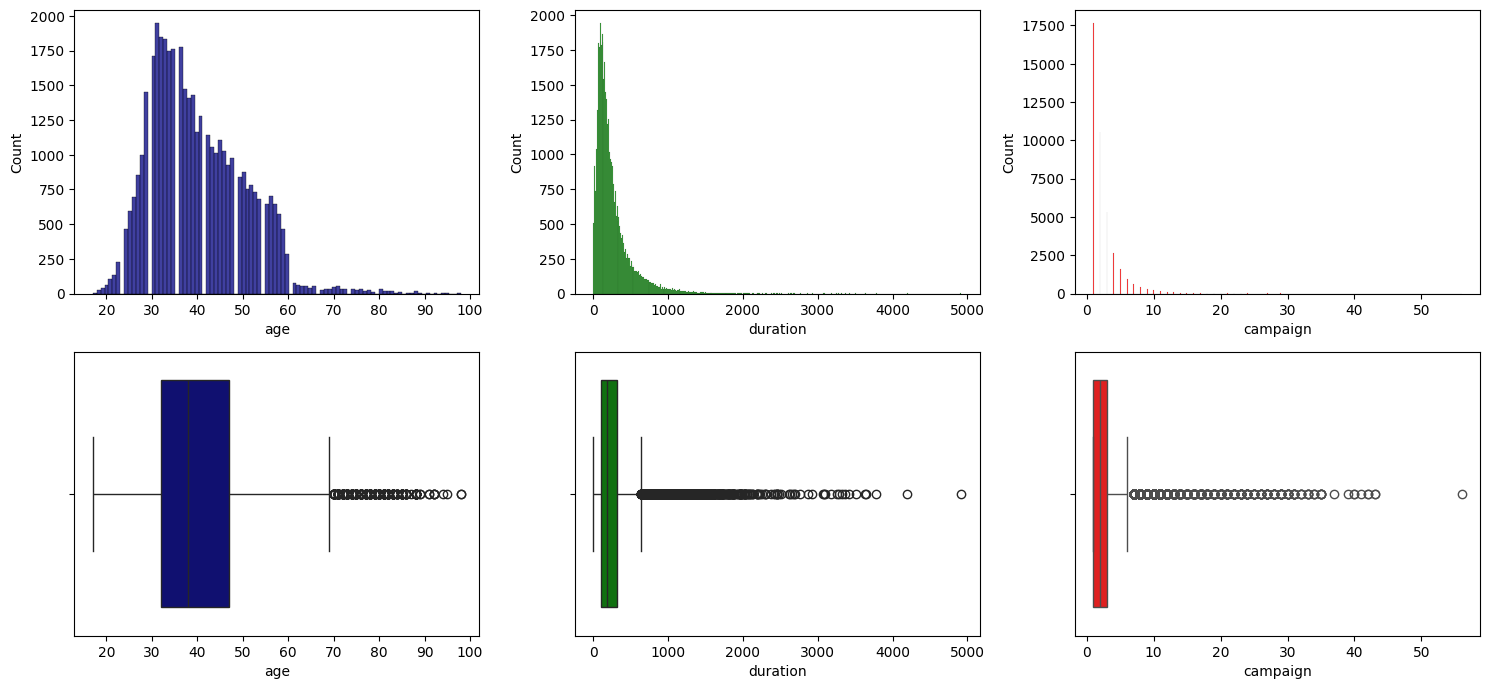

In [6]:
#Numerics
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = bank_ds, x = "age", color='navy')
sns.boxplot(ax = axis[1, 0], data = bank_ds, x = "age", color='navy')
sns.histplot(ax = axis[0, 1], data = bank_ds, x = "duration", color='green')
sns.boxplot(ax = axis[1, 1], data = bank_ds, x = "duration", color='green')
sns.histplot(ax = axis[0, 2], data = bank_ds, x = "campaign", color='red')
sns.boxplot(ax = axis[1, 2], data = bank_ds, x = "campaign", color='red')

plt.tight_layout()
plt.show()

As this plots shows, the skewness of a right-skewed distribution is positive, meaning that the mean is greater than the median in all three graphs.

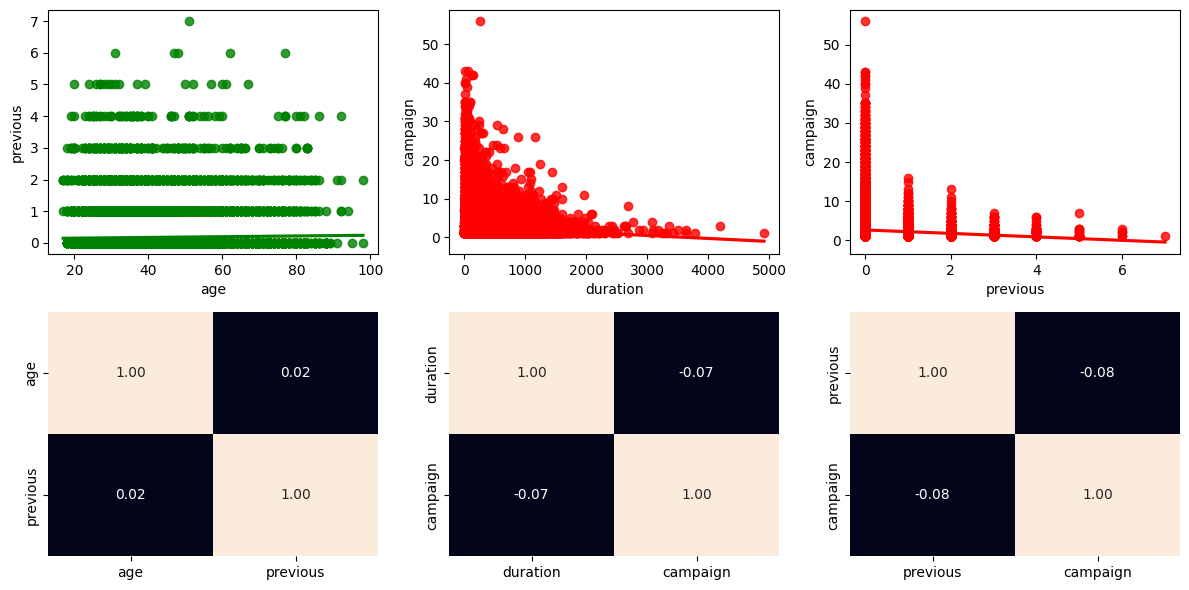

In [7]:
#Numeric-numeric
fig, axis = plt.subplots(2, 3, figsize = (12, 6))

sns.regplot(ax = axis[0, 0], data = bank_ds, x = "age", y = "previous", color='green')
sns.heatmap(bank_ds[["age", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = bank_ds , x = "duration", y = "campaign", color='red')
sns.heatmap(bank_ds[["duration", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = bank_ds , x = "previous", y = "campaign", color='red')
sns.heatmap(bank_ds[["previous", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

plt.tight_layout()
plt.show()

For this three plots we see that there is no correlation between duration, campaign, previous and age. 

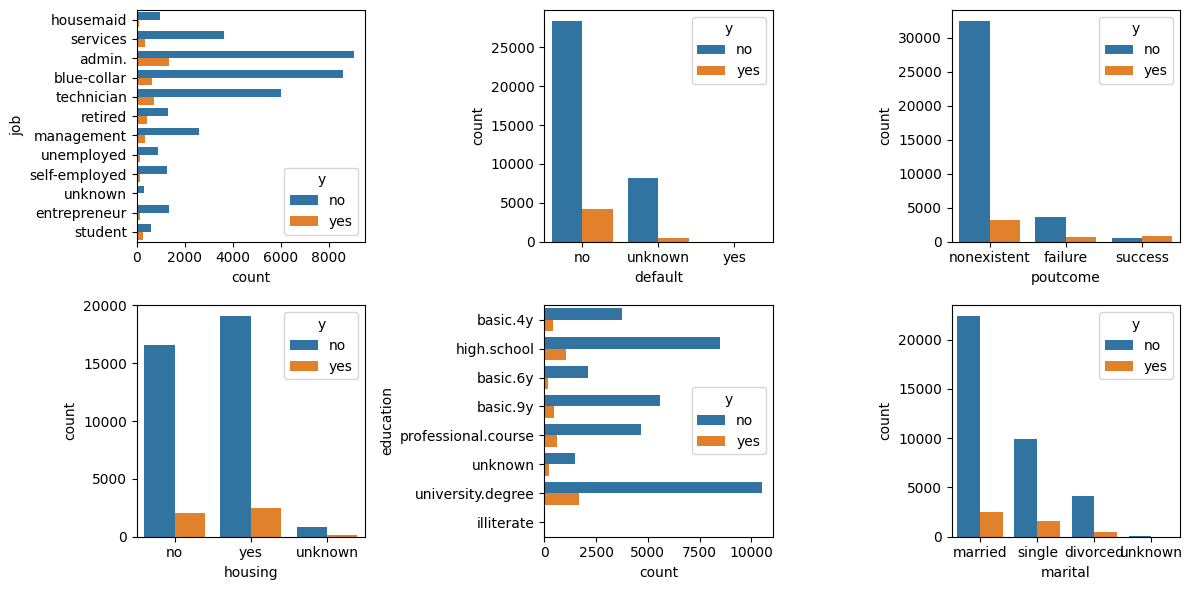

In [8]:

#Categorical-categorical
fig, axis = plt.subplots(2, 3, figsize = (12, 6))

sns.countplot(ax = axis[0, 0], data = bank_ds, y = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = bank_ds, x = "default", hue = "y")
sns.countplot(ax = axis[0, 2], data = bank_ds, x = "poutcome", hue = "y")
sns.countplot(ax = axis[1, 0], data = bank_ds, x = "housing", hue = "y")
sns.countplot(ax = axis[1, 1], data = bank_ds, y = "education", hue = "y")
sns.countplot(ax = axis[1, 2], data = bank_ds, x = "marital", hue = "y")

plt.tight_layout()
plt.show()

The majority of people who signing up for long-term deposit are spread throughout the plot, we can see them in all categories. On the other hand, we can highlight that the majority of those who did signing up have no credit, and the ones how has a housing loan, a university degree, are married and work in the admin, blue-collar, technician and services areas. 

In [9]:
#factorize
bank_ds['job_n'] = pd.factorize(bank_ds['job'])[0]
bank_ds['marital_n'] = pd.factorize(bank_ds['marital'])[0]
bank_ds['education_n'] = pd.factorize(bank_ds['education'])[0]
bank_ds['default_n'] = pd.factorize(bank_ds['default'])[0]
bank_ds['housing_n'] = pd.factorize(bank_ds['housing'])[0]
bank_ds['loan_n'] = pd.factorize(bank_ds['loan'])[0]
bank_ds['poutcome_n'] = pd.factorize(bank_ds['poutcome'])[0]
bank_ds['y_n'] = pd.factorize(bank_ds['y'])[0]
bank_ds.head()

,age,job,marital,education,default,housing,loan,duration,campaign,previous,...,euribor3m,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,...,4.857,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,0,...,4.857,no,1,0,1,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,0,...,4.857,no,1,0,1,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,0,...,4.857,no,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,0,...,4.857,no,1,0,1,0,0,1,0,0


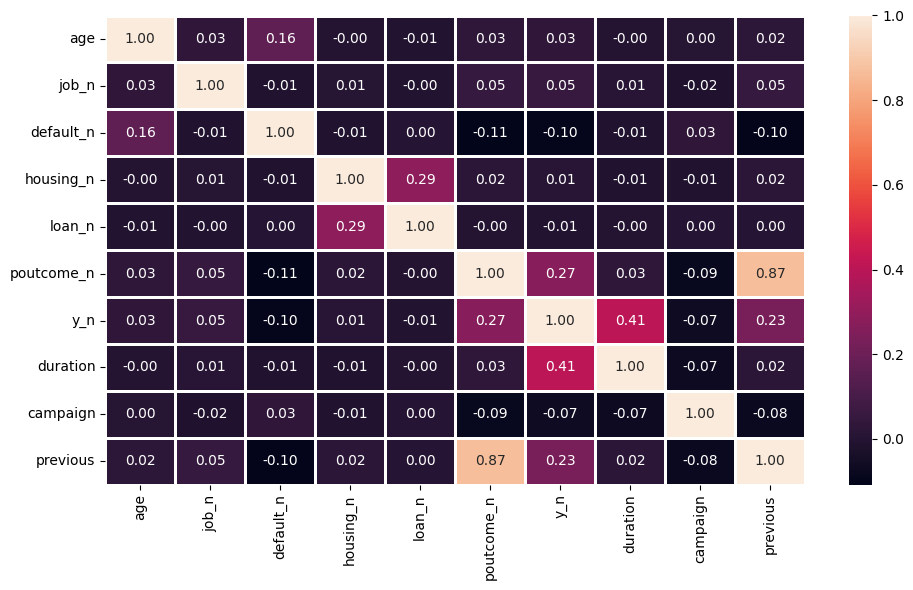

In [10]:
#correlacion

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(bank_ds[['age','job_n', 'default_n', 'housing_n', 'loan_n', 'poutcome_n', 'y_n','duration', 'campaign', 'previous']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()

In this correlation plot we can apreciate some things:
- the previous and the poutcome are very correlated, because they are the number of contacts made during the previous campaign and the result of the same campaign.
- loan and housing are a little correlated.
- duration and the y (target) are also correlated, because the duration gets longer if the client signed up for the long-term deposit. The same for the previuos and the y (target). 
- we can also see that the y and the poutcome are a little correlated.

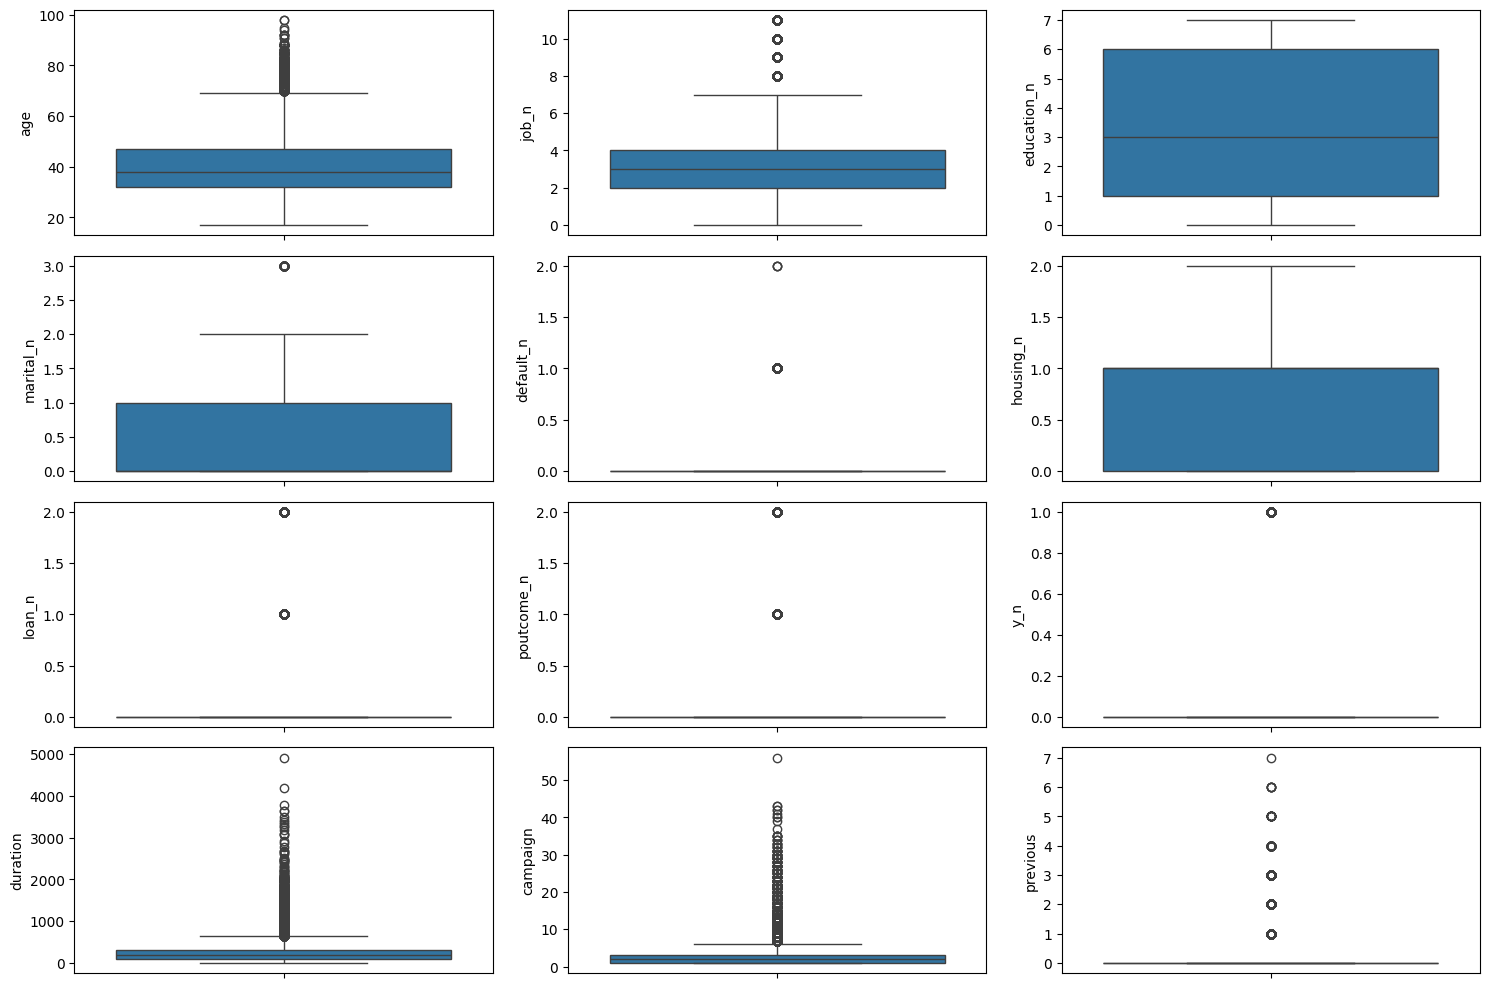

In [11]:
#outliers
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = bank_ds, y = "age")
sns.boxplot(ax = axis[0, 1], data = bank_ds, y = "job_n")
sns.boxplot(ax = axis[0, 2], data = bank_ds, y = "education_n")
sns.boxplot(ax = axis[1, 0], data = bank_ds, y = "marital_n")
sns.boxplot(ax = axis[1, 1], data = bank_ds, y = "default_n")
sns.boxplot(ax = axis[1, 2], data = bank_ds, y = "housing_n")
sns.boxplot(ax = axis[2, 0], data = bank_ds, y = "loan_n")
sns.boxplot(ax = axis[2, 1], data = bank_ds, y = "poutcome_n")
sns.boxplot(ax = axis[2, 2], data = bank_ds, y = "y_n")
sns.boxplot(ax = axis[3, 0], data = bank_ds, y = "duration")
sns.boxplot(ax = axis[3, 1], data = bank_ds, y = "campaign")
sns.boxplot(ax = axis[3, 2], data = bank_ds, y = "previous")

plt.tight_layout()
plt.show()

In [12]:
bank_ds.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,3.673691,0.510634,3.277532,0.208872,0.571914,0.199767,0.169904,0.112654
std,10.42125,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,2.454116,0.696779,2.185525,0.406686,0.541209,0.456002,0.455754,0.316173
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [13]:
bank_ds.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
poutcome_n        0
y_n               0
dtype: int64

In [18]:
bank_ds.head()

,age,job,marital,education,default,housing,loan,duration,campaign,previous,...,euribor3m,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,0,...,4.857,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,0,...,4.857,no,1,0,1,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,0,...,4.857,no,1,0,1,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,0,...,4.857,no,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,0,...,4.857,no,1,0,1,0,0,1,0,0


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

num_variables = ['age' ,'job_n','marital_n', 'education_n','default_n','housing_n', 'loan_n', 'poutcome_n','duration', 'campaign', 'euribor3m']


# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = bank_ds.drop('y_n', axis = 1)[num_variables]
y = bank_ds["y_n"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)

#normalize select data
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

#transform to dataframe
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns= X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, index= X_test.index, columns= X_test.columns)

X_train_norm.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,duration,campaign,euribor3m
12556,-0.001669,-0.271142,-0.738185,-0.12745,1.948567,0.787712,-0.438945,-0.373487,-0.631114,-0.206242,0.771354
35451,-0.864095,-0.677848,-0.738185,1.24463,-0.512631,-1.056870,-0.438945,-0.373487,-0.546321,0.513676,-1.372028
30592,1.819007,0.542271,-0.738185,-1.49953,-0.512631,-1.056870,-0.438945,1.822906,-0.943306,1.233593,-1.308581
17914,0.285806,-1.491260,2.126401,-0.12745,-0.512631,0.787712,-0.438945,-0.373487,-0.631114,0.873635,0.771930
3315,-0.097494,-0.677848,0.694108,-1.04217,1.948567,-1.056870,-0.438945,-0.373487,0.332441,-0.206242,0.713674


In [20]:

# Con un valor de k = 6 queremos decir implícitamente que queremos eliminar características del conjunto de datos
selection_model = SelectKBest(f_regression, k = 6)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

X_train_sel.head()

X_train_sel.to_csv(r"/workspace/eda_2/data/processed/clean_train.csv", index = False)
X_test_sel.to_csv(r"/workspace/eda_2/data/processed/clean_test.csv", index = False)

In [21]:
train_data = pd.read_csv(r"/workspace/eda_2/data/processed/clean_train.csv")
test_data = pd.read_csv(r"/workspace/eda_2/data/processed/clean_test.csv")

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state= 12, solver='newton-cholesky')
model.fit(X_train, y_train)


LogisticRegression(random_state=12, solver='newton-cholesky')

In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [24]:
acc = accuracy_score(y_test, y_pred)
print(f"the acurrancy is {acc}")

the acurrancy is 0.9032532168001942


In [25]:
from sklearn.model_selection import GridSearchCV
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=12,
                                          solver='newton-cholesky'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [26]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}


Antes habia ejecutado y me dio este resultado Mejores hiperparámetros: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [29]:

model_grid = LogisticRegression(penalty = 'l2', C = 100, solver = 'lbfgs', random_state= 12)
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
acc_grid = accuracy_score(y_test, y_pred)
print(f"the new accuracy is {acc_grid}")

the new accuracy is 0.9041029376062151
